# Исследование данных о продажах интернет-магазина «Стримчик»

Некий интернет-магазине продаёт по всему миру компьютерные игры. Для исследования доступны из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

# Цели проекта
* Выявить имеющиеся в данных закономерности 
* Определить потенциально прибыльные платформы 
* Оценить влияние на продажи отзывов пользователей и критиков внутри одной популярной платформы
* Составить портрет пользователя каждого региона
* Проверить гипотезы о: 
    - равенстве средних пользовательских рейтингах платформ Xbox One и PC,
    - неравенстве средних пользовательских рейтингах жанров Action и Sports.


**План работы**

1. Открыть и изучить датасет /datasets/games.csv
2. Провести предобработку данных 
3. Проведити исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверьте гипотезы
6. Написать общий вывод 


In [151]:
# импортируем нужные для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
#import pylab

from scipy import stats as st  
import scipy.stats

## Данные 

In [227]:
# чтение файла с данными с сохранением в data
try:
    data = pd.read_csv('C:\\Users\Aleks\\Download\\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [153]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Наблюдения**
* всего 16715 строк
* есть пропуски в данных
* год выхода формат float64
* User_Score формат object, хотя должен быть числовой 

## Предобработка данных

### Редактируем названия столбцов 
Приводим к нижнему регистру 

In [155]:
data.columns = data.columns.str.lower()

In [156]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

In [157]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [158]:
# изменим тип даннях для года: из float в целочисленный 
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [159]:
data['year_of_release'].min()

1980

In [160]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Данные из столбца 'critic_sore' (оценка критиков) также стоит перевести в целочисленный формат, посколько оценки без десятичных значений, а операции с плавающей точкой в python менее точные.

In [161]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [163]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


### Работа с пропусками

In [164]:
# функция для подсчёта процента пропусков от общего числа данных и изображения рез-та на столбчатой диаграмме
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (15,5), legend = False, fontsize = 16, grid=True)
            .set_title('Количество пропущенных значений в столбцах, %', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('Пропусков не осталось')

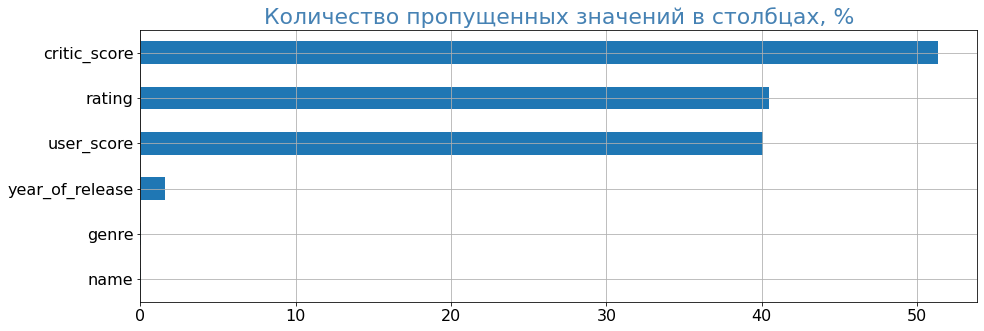

In [165]:
pass_value_barh(data)

In [166]:
data[data['critic_score'].isna()].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6300,Bridge,2600,1980,Misc,0.25,0.02,0.00,0.00,<NA>,NaN,NaN
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.00,0.03,<NA>,NaN,NaN
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.00,0.05,<NA>,NaN,NaN
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.00,0.01,<NA>,NaN,NaN
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.00,0.01,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.00,<NA>,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,<NA>,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,<NA>,Shooter,0.01,0.00,0.00,0.00,<NA>,NaN,M
16348,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,<NA>,NaN,NaN


In [167]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)


**Наблюдения**

В столбце 'critic_score' отсутсвует более 50% данных, а 'user_score' около 40%. В этом случае целесообразно оставить пропуски так как есть, поскольку заполнение медианой или средним внесёт неточности в дынные. 

В столбце 'rating' пропущено около 40% данных. Занчения в столбце - это буквенные обозначения (формат object). В данном случае мы не можем заменить попуски на какое-то значение рейтинга, но можем заменить NaN на 'unknown'. Таким образом мы сможем сохранить данные для дальнейшего анализа влияния рейтинга на продажи. 

Стоит отметить, что часто в строках значения пропущены сразу для всех этих трёх столбцов.

В столбце 'year_of_release', 'name', 'genre' также есть пропуски, но их менее 5% от общего числа дынных. В данном случае можно просто удалить строки, где пропущены данные. 

Также в столбце 'user_score' обнаружено обозначение tbd. Стоит далее рассмотреть его более подробно. 

**Возможные причины пропусков**

Данные в 'critic_score', 'rating' и 'user_score' пропущены как для игр выпущенных очень давно, так и выпущенных недавно. Но если обратить внимание на столбцы с суммой продаж, то видим, что продажи были либо нулевыми, либо очень низкими. Возможно это непопулярные игры, которые не получили оценки. 

В случае с пропусками в годе, названии и жанре, скорее всего - это какие-то технические ошибке при сборе базы данных.


Заменим пропуски в столбце 'rating' на  'unknown'.

In [168]:
data['rating'] = data['rating'].fillna(value='unknown')

In [169]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Удалим строки где есть пропуски в столбцах 'year_of_release', 'name', 'genre' и обновим индексы. 

In [170]:
data = data.dropna(subset=['year_of_release', 'name', 'genre']).reset_index()

In [171]:
data.isna().sum()

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [172]:
data.shape

(16444, 12)

### TBD в 'user_score'

In [173]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

"*TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить.*"

In [174]:
data.query('user_score == "tbd"')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
300,301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
516,520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
639,645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
709,718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16424,16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16426,16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16427,16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16433,16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


В 2376 строках в столбце user_score встречается значение tbd. Возможно, при создании базы по продажам игр планировалось в последствии, при появлении оценки пользователей, заполнить эти данный. Одним из возможных путей решения данной проблемы может быть обновление базы и поиск рейтинга для данных игр в интернете в свободном доступе. 

В данном исследовании заменим tbd на NaN. 

In [175]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
# использование аргумента errors='coerce' позволяет атоматически заменить недопустимые значения на NaN

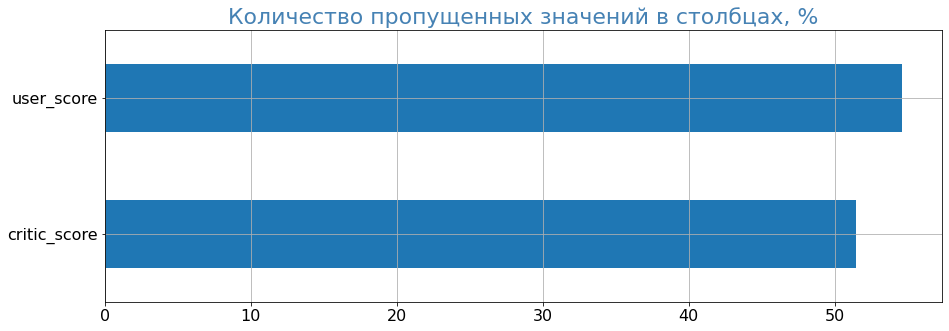

In [176]:
pass_value_barh(data)

Количество пропусков в столбце user_score возросло на 15%, но теперь изменили тип данных с object на float и можем производить арифметические операции с данными из столбца. 

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  Int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   Int64  
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


### Суммарные продажи

Посчитаем суммарные продажи по всем регионам:

In [178]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 

In [179]:
data.tail()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,<NA>,NaN,unknown,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,<NA>,NaN,unknown,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,unknown,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,<NA>,NaN,unknown,0.01
16443,16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,<NA>,NaN,unknown,0.01


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

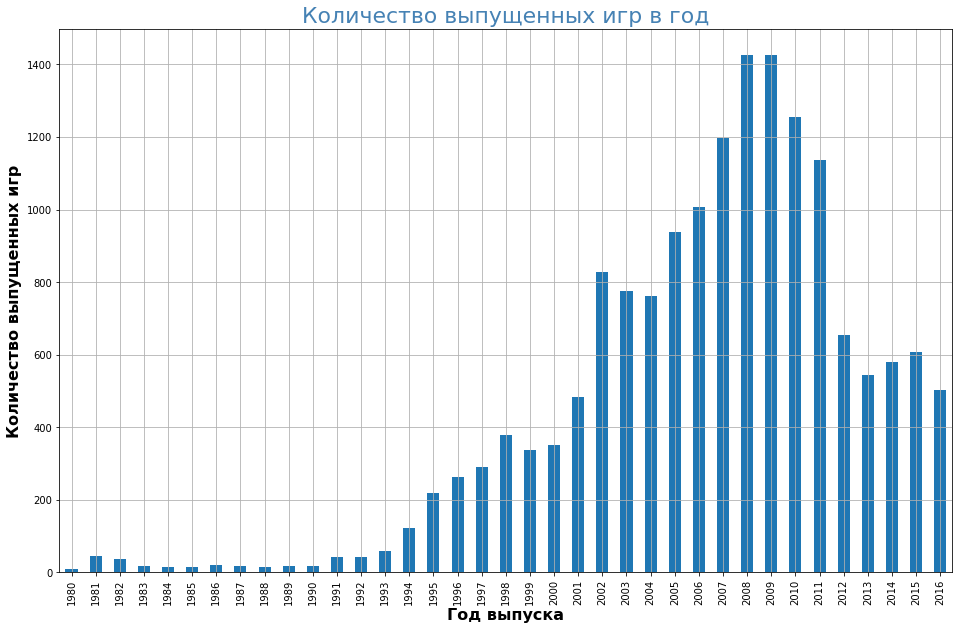

In [180]:
ax = data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize = (16, 10), grid=True)

ax.set_title('Количество выпущенных игр в год', fontsize = 22, color = 'SteelBlue')
ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Количество выпущенных игр", labelpad=5, weight='bold', size=16);


**Наблюдения**

До 1994 ежегодно выпускалось очень маленькое количество игр, менее 100 в год. Далее начался довольно активный рост, который продолжался до 2008 года. В 2008 было выпущено максимальное количество игр за рассматриваемый период. Далее произошел спад, особенно резкий после 2010 года. Количество игр, выпущенных между 2012 и 2016 осциллирует около 500-600 штук/год.

Данные об играх, вылущенных ранее 1995 года, не релевантны для исследования актуального состояния игровой индустрии. 


Рассмотрим динамику уникальных игр по годам. 

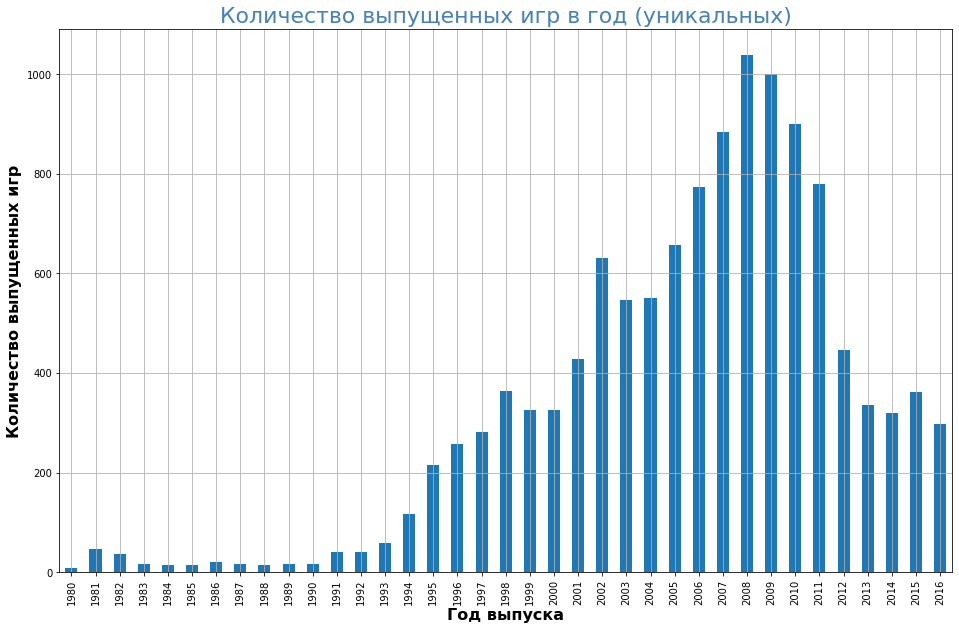

In [181]:
ax = data.groupby('year_of_release')['name'].nunique().plot(kind='bar', figsize = (16, 10), grid=True)

ax.set_title('Количество выпущенных игр в год (уникальных)', fontsize = 22, color = 'SteelBlue')
ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Количество выпущенных игр", labelpad=5, weight='bold', size=16);

Сопоставим два графика: 

In [182]:
a = data.groupby('year_of_release')['name'].count().to_frame() # Количество выпущенных игр в год 
#a

In [183]:
b = data.groupby('year_of_release')['name'].nunique().to_frame() # Количество выпущенных игр в год (уникальных)
#b

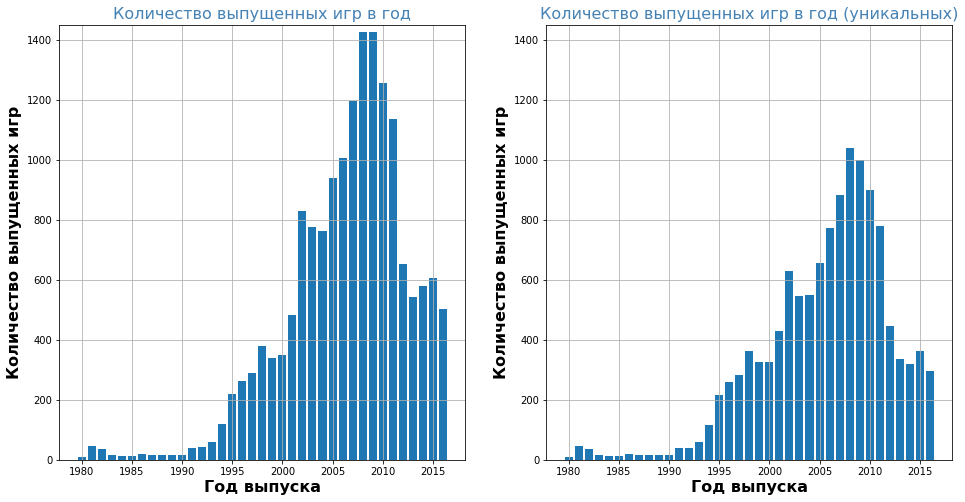

In [184]:
fig, axes = plt.subplots(1, 2)


#subplot 1 Количество выпущенных игр в год 
axes[0].bar(x=a.index, height=a['name'])


#subplot 2 Количество выпущенных игр в год (уникальных)
axes[1].bar(x=b.index, height=b['name'])

# настраиваем графики
axes[0].set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
axes[1].set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
axes[0].set_ylabel("Количество выпущенных игр", labelpad=5, weight='bold', size=16);
axes[1].set_ylabel("Количество выпущенных игр", labelpad=5, weight='bold', size=16);

axes[0].set_title('Количество выпущенных игр в год', fontsize = 16, color = 'SteelBlue')
axes[1].set_title('Количество выпущенных игр в год (уникальных)', fontsize = 16, color = 'SteelBlue')
axes[0].grid(True)
axes[1].grid(True)
axes[0].set_ylim(0,1450) 
axes[1].set_ylim(0,1450)

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(8)    #  высота 

**Выводы**

Распределение кол-ва уникальных игр, выпущеных в год, аналогично распределению общего количества выпущенных в год игр, однако значения несколько ниже. Из чего можно сделать вывод, что одну и туже игру могли выпускать несколько раз за год. 

### Продажи по платформам

* Как менялись продажи по платформам. 
* Для платформ с наибольшими суммарными продажами построить распределение по годам. 
* За какой характерный срок появляются новые и исчезают старые платформы?


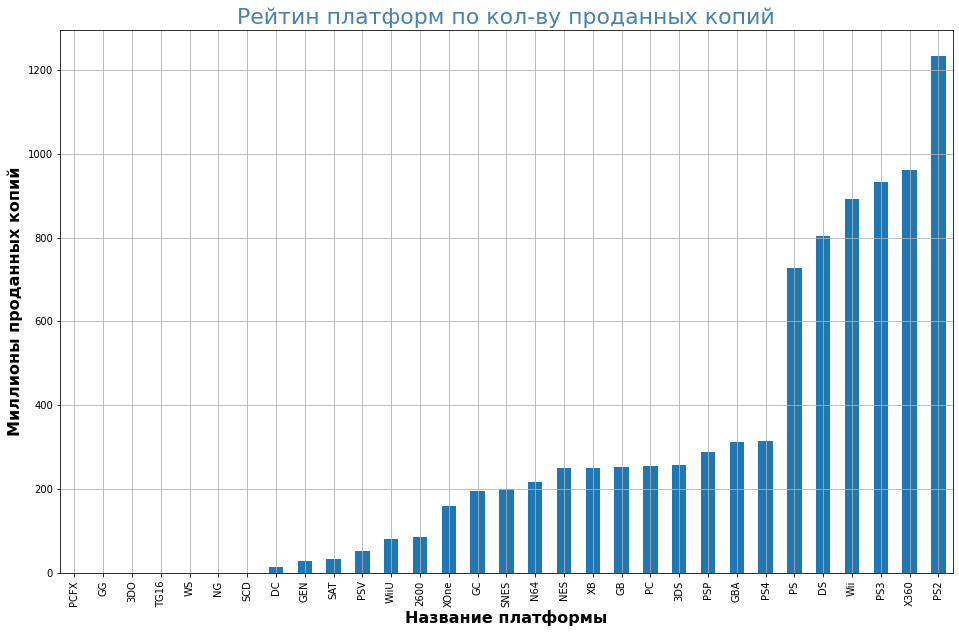

In [185]:
ax = data.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(kind='bar', figsize = (16, 10), grid=True)

ax.set_title('Рейтин платформ по кол-ву проданных копий', fontsize = 22, color = 'SteelBlue')
ax.set_xlabel("Название платформы", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16);

 Платформы с наибольшими суммарными продажами:
 * PS 
 * DS
 * Wii
 * PS3
 * X360
 * PS2
 
 С довольно сильным "отставанием" за этим платформами следуют:
 * PS4
 * GBA 
 * PSP 
 
 и другие.
 
Построим для этих 9 платформ распредление по годам. 

In [186]:
top_platform = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2', 'PS4', 'GBA', 'PSP'] # сохраним названия самых популярных платформ в отдельный список

top_platform_data = data.query('platform in @top_platform') # запишим в отдельный датасет данные по популярным платформам

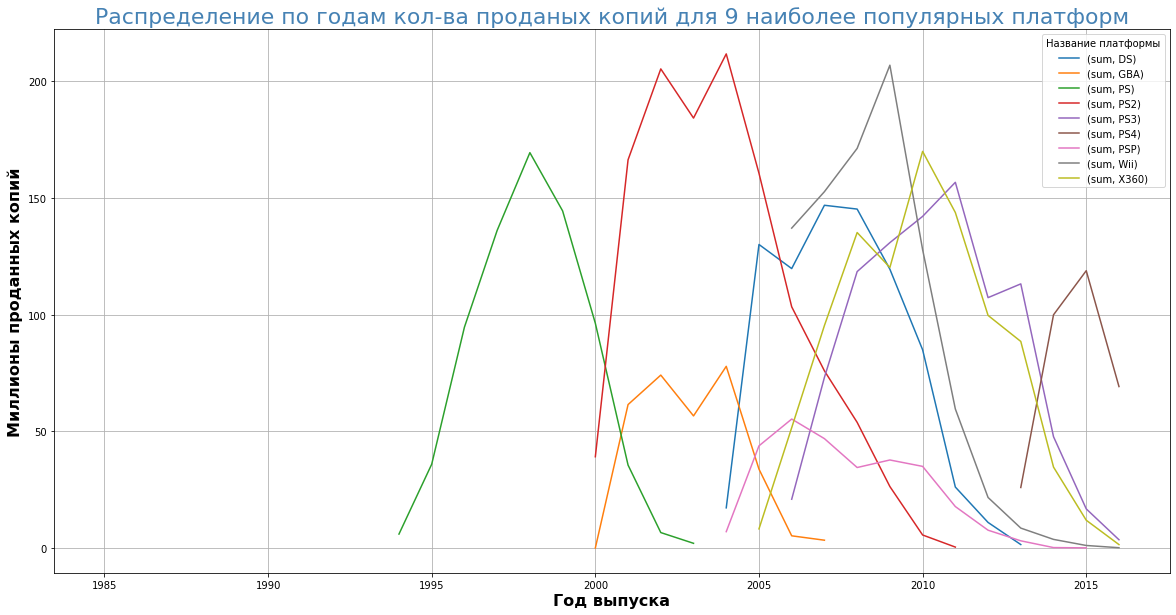

In [187]:
top_platform_pivot = top_platform_data.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc=['sum']
)

ax = top_platform_pivot.plot(figsize=(20, 10), grid=True);

ax.set_title('Распределение по годам кол-ва проданых копий для 9 наиболее популярных платформ', fontsize = 22, color = 'SteelBlue')
ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16)
ax.legend(title='Название платформы');

В среднем каждая платформа существует 10-15 лет. Причём пик продаж примерно приходится на середину периода существования.

В период между 2004-2006 появилось 5 новых платформ, практически все эти платформы просущестовали до 2016 года. До этого успешные платформы появлялись примерно каждые 4-6 лет. 

Для анализа актуальной ситуации в игровой индустрии достаточно данных с 2005 по 2016 гг. В этом случае возможно исследовать полный "цикл жизни" платформ и выявить закономерности, которые помогут в дальнейшем прогнозировании рынка. Однако, рынок игр - это рынок, который активно меняется. Для отслеживания последних изменений и тенденций достаточно данных за последние несколько лет. 

In [188]:
platform_pivot = data.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc=['sum']
)

#ax = platform_pivot.plot(figsize=(20, 10), grid=True);

#ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
#ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16);

### Актуальный период


За актуальный период примем период с 2014 по 2016 год включительно. Это позволит оценить наиболее "свежие" тенденции на рынке видеоигр, поскольку охватим последние 3 годы из базы данных. Можно было бы ограничится и данными за 2015-2016 гг, но из описания к данным мы знаем, что данные за 2016 год могут быть неполными.



Перезапишем в новый датасет данный за актуальный период.

In [189]:
data_actual = data[data['year_of_release'] > 2013]

#### Выбор потенциально прибыльных платформ

* Какие платформы лидируют по продажам, растут или падают? 
* Какие платформы можно считать потенциально прибыльными?


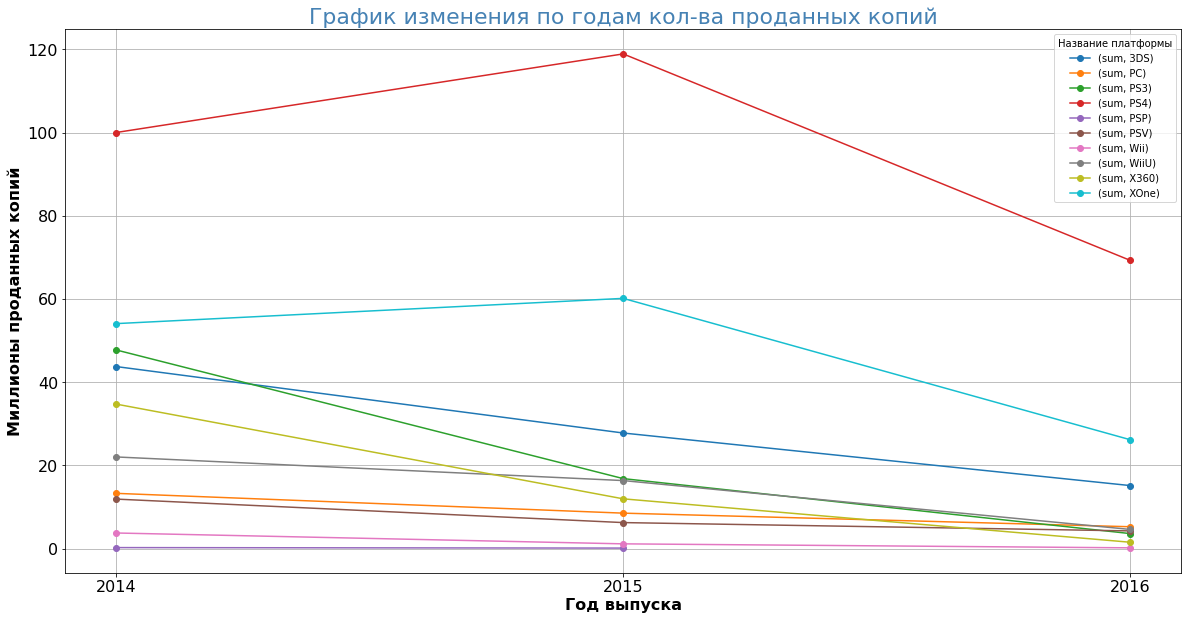

In [190]:
# сгруппируем данные по годам и платформам и посчитаем суммарные продажи
year_platform_pivot = data_actual.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc=['sum']
)


ax = year_platform_pivot.plot(
    figsize=(20,10), grid=True, style='-o',
)

ax.set_title('График изменения по годам кол-ва проданных копий', fontsize = 22, color = 'SteelBlue')  
ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend(title='Название платформы');

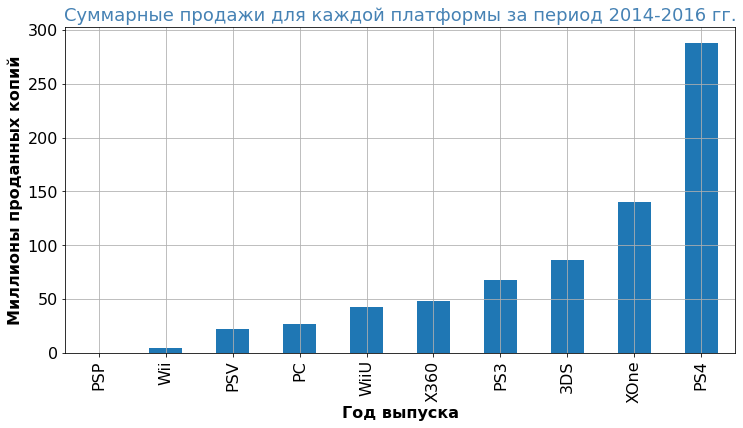

In [191]:
ax = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
    kind='bar', figsize = (12, 6), grid=True
)

ax.set_title('Суммарные продажи для каждой платформы за период 2014-2016 гг.', fontsize = 18, color = 'SteelBlue') 
ax.set_xlabel("Год выпуска", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16);

**Выводы**

За период 2014-2016 гг. наиболее прибыльной была платформа PS4. Для этой платформы было продано почти 300 миллиона копий игр. С большим отрывом за ней следует XOne (около 150 млн.проданных копий).

Не смотря на то что продажи на этих двух платформах в 2016 году ниже, чем в 2015 (что в свою очередь может быть связано с неполнотой данных для 2016 года), PS4 и XOne можно считать потенциально прибыльными платформами, т.к. мы не можем с уверенностью сказать, что тенденция на снижение сохраниться до 2017 года. Эти платформы были выпущены только в 2013 году и до 2015 продажи росли.

Для остальных же платформ прослеживается явная тенденция на снижение. Количество проданных в 2016 году копий для остальных платформ не превышало 20 миллионов.


In [192]:
len(data_actual['name'].unique())

956

#### Распредление глобальных продаж в разбивке по платформам ("ящик с усами")

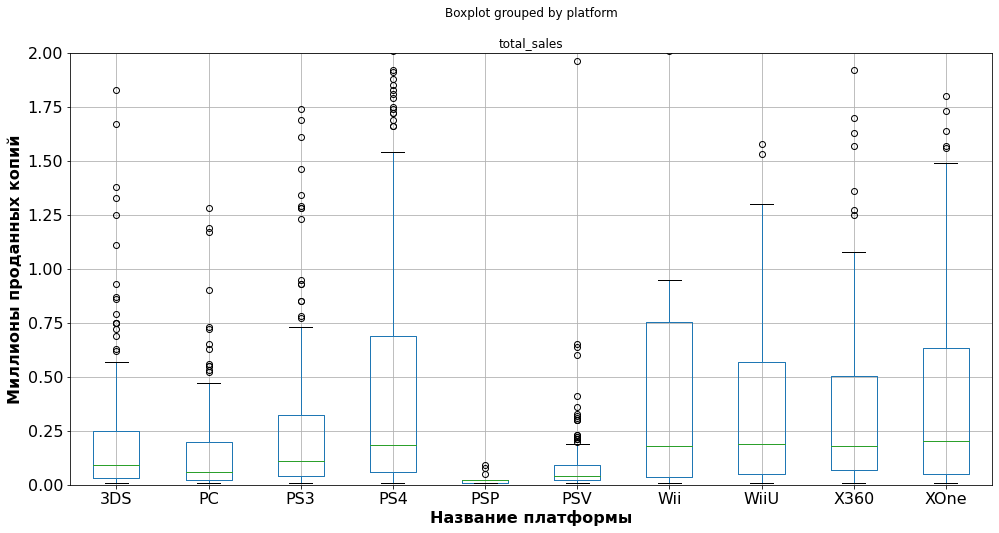

In [193]:
ax = data_actual.boxplot(column='total_sales', by='platform', figsize=(16,8))

ax.set_xlabel("Название платформы", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16)
ax.set_ylim(0, 2)
ax.tick_params(labelsize=16);

Среди всех платформ можем выделить пять платформ с большими межквартильными расстояниями и длинным верхним усом - это:
* PS3,
* PS4,
* WiiU,
* X360,
* Xone.

Это говорит о сильной изменчивости данных, в данном случае кол-ва проданных копий, от сравнительно небольшого кол-ва до очень высоких продаж.

Для всех платформ, кроме PS2, можем наблюдать наличие аномально высоких значений и смещение медианы в сторону низких значений. Распределение не симметричные и скорее всего данные не распределены нормально. 

Для всех платформ, кроме X360, медианное значение не превышает 0.25 млн. проданных копий. 




#### Влияние отзывов пользователей и критиков на продажы 
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Рассмотрим влиение отзывов на продажи для наиболее поппулярной платформы в период с 2014 по 2016 гг. - **PS4**. 

In [194]:
# сохраним данные для самой популярной платформы в отдельный датасет
data_PS4 = data_actual[data_actual['platform'] == 'PS4']

In [195]:
# посчитаем корреляционную матрицу 
data_PS4.corr().style.format("{:.3f}").background_gradient(cmap='Blues', axis=1).highlight_max(color='lightgreen')

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000,0.357,-0.562,-0.535,-0.388,-0.581,-0.467,-0.032,-0.581
year_of_release,0.357,1.000,-0.219,-0.195,-0.041,-0.219,-0.044,0.036,-0.214
na_sales,-0.562,-0.219,1.000,0.785,0.491,0.945,0.412,-0.016,0.928
eu_sales,-0.535,-0.195,0.785,1.000,0.472,0.944,0.340,-0.064,0.958
jp_sales,-0.388,-0.041,0.491,0.472,1.000,0.510,0.379,0.179,0.539
other_sales,-0.581,-0.219,0.945,0.944,0.510,1.000,0.405,-0.044,0.998
critic_score,-0.467,-0.044,0.412,0.340,0.379,0.405,1.000,0.546,0.403
user_score,-0.032,0.036,-0.016,-0.064,0.179,-0.044,0.546,1.000,-0.040
total_sales,-0.581,-0.214,0.928,0.958,0.539,0.998,0.403,-0.040,1.000


По корреляционной матрице можем сделать вывод о наличии положительной линейной связи средней силы между продажами и оценкой критиков. 
Коэффициент корреляции между глобальными продажами и оценкой критиков составляет 0.40.
При этом, если рассматривать региональные данные, влияние оценок критиков на продажи в Северной Америке сильнее, чем для других регионов (r=0.42). А в Японии взаимосвязь между оценкой критиков и продажами наиболее слабая (0.32).

Связи глобальных продаж с оценкой пользователей выявлено не было. Для региональных продаж только продажи в Японии имеют очень слабую положительную линейную связь с оценкой пользователей (r=0.17). 


Построим диаграммы рассеяния.

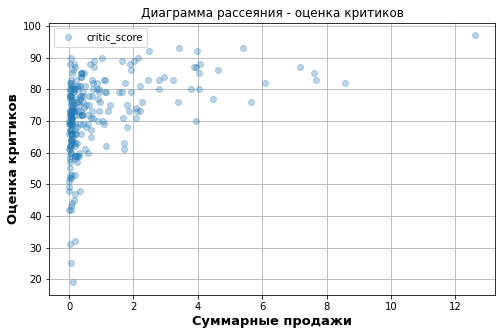

In [196]:
ax = data_PS4.plot(
    x='total_sales', y='critic_score', 
    style='o', alpha=0.3, 
    title='Диаграмма рассеяния - оценка критиков', 
    grid=True, figsize=(8,5)
)
ax.set_xlabel("Суммарные продажи", labelpad=3, weight='bold', size=13)
ax.set_ylabel("Оценка критиков", labelpad=3, weight='bold', size=13);

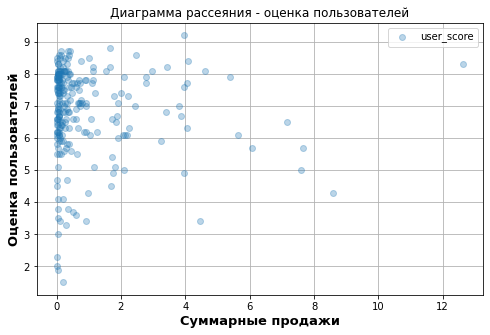

In [197]:
ax = data_PS4.plot(
    x='total_sales', y='user_score', 
    style='o', alpha=0.3, 
    title='Диаграмма рассеяния - оценка пользователей', 
    grid=True, figsize=(8,5)
)
ax.set_xlabel("Суммарные продажи", labelpad=3, weight='bold', size=13)
ax.set_ylabel("Оценка пользователей", labelpad=3, weight='bold', size=13);

**Выводы**

Коэффициент корреляции между оценкой критиков и суммарными продажами составляет 0.40. Это говорит о наличии слабой положительной линейной связи, т.е. чем выше оценка, тем больше кол-во продаж. Эта связь более выряжена в области высоких оценок, от 70 баллов и выше. Стоит отметить, что если рассматривать региональные продажи, то связь между оценкой критиков и продажами наиболее высокая для Северной Америки (r=0.42), а самая низкая - для Японии (r=0.32). Если судить по диаграммам рассеяния, то можно предположить, что для продаж и оценок критиков существует нелинейная взаимосвязь.

Между тем, связи между оценкой пользователей и суммарными продажами выявлено не было. Облако точек на диаграмме довольно рассеянное и присутствуют выбивающиеся значения. Возможно, исключив выбросы, можно будет проследить наличие линейной взаимосвязи, поскольку на диаграмме видим группу точек для которых при увеличении оценки увеличивается и значение продаж. 



**Сопоставим выводы с продажами игр на других платформах.**

Рассмотрим коэффициенты корреляции для ещё двух популярных  платформ (PS3 и XOne) и одной менее популярной (РС).

In [198]:
data_actual[data_actual['platform'] == 'PS3'].corr().style.format("{:.3f}")\
                                             .background_gradient(cmap='Blues', axis=1).highlight_max(color='lightgreen')

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000,0.301,-0.625,-0.524,-0.345,-0.615,-0.454,0.064,-0.643
year_of_release,0.301,1.000,-0.232,-0.161,-0.104,-0.211,-0.045,-0.258,-0.215
na_sales,-0.625,-0.232,1.000,0.737,0.017,0.928,0.413,-0.223,0.900
eu_sales,-0.524,-0.161,0.737,1.000,0.026,0.935,0.287,-0.162,0.946
jp_sales,-0.345,-0.104,0.017,0.026,1.000,0.024,0.450,0.295,0.149
other_sales,-0.615,-0.211,0.928,0.935,0.024,1.000,0.391,-0.206,0.990
critic_score,-0.454,-0.045,0.413,0.287,0.450,0.391,1.000,0.693,0.447
user_score,0.064,-0.258,-0.223,-0.162,0.295,-0.206,0.693,1.000,-0.167
total_sales,-0.643,-0.215,0.900,0.946,0.149,0.990,0.447,-0.167,1.000


In [199]:
data_actual[data_actual['platform'] == 'XOne'].corr().style.format("{:.3f}")\
                                              .background_gradient(cmap='Blues', axis=1).highlight_max(color='lightgreen')

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000,0.383,-0.635,-0.603,-0.305,-0.660,-0.509,0.026,-0.661
year_of_release,0.383,1.000,-0.225,-0.204,-0.173,-0.232,-0.012,-0.033,-0.231
na_sales,-0.635,-0.225,1.000,0.763,0.435,0.988,0.401,-0.068,0.970
eu_sales,-0.603,-0.204,0.763,1.000,0.425,0.852,0.385,-0.062,0.898
jp_sales,-0.305,-0.173,0.435,0.425,1.000,0.451,0.207,0.062,0.461
other_sales,-0.660,-0.232,0.988,0.852,0.451,1.000,0.426,-0.070,0.995
critic_score,-0.509,-0.012,0.401,0.385,0.207,0.426,1.000,0.441,0.429
user_score,0.026,-0.033,-0.068,-0.062,0.062,-0.070,0.441,1.000,-0.070
total_sales,-0.661,-0.231,0.970,0.898,0.461,0.995,0.429,-0.070,1.000


In [200]:
data_actual[data_actual['platform'] == 'PC'].corr().style.format("{:.3f}")\
  .background_gradient(cmap='Blues', axis=1).highlight_max(color='lightgreen').highlight_null(null_color='grey')

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1547: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000,0.246,-0.656,-0.718,nan,-0.731,-0.365,0.015,-0.726
year_of_release,0.246,1.000,-0.181,-0.245,nan,-0.203,-0.029,-0.001,-0.229
na_sales,-0.656,-0.181,1.000,0.830,nan,0.954,0.186,-0.082,0.929
eu_sales,-0.718,-0.245,0.830,1.000,nan,0.949,0.159,-0.062,0.977
jp_sales,nan,nan,nan,nan,nan,nan,nan,nan,nan
other_sales,-0.731,-0.203,0.954,0.949,nan,1.000,0.183,-0.076,0.991
critic_score,-0.365,-0.029,0.186,0.159,nan,0.183,1.000,0.466,0.175
user_score,0.015,-0.001,-0.082,-0.062,nan,-0.076,0.466,1.000,-0.072
total_sales,-0.726,-0.229,0.929,0.977,nan,0.991,0.175,-0.072,1.000


**Выводы**

Порядок значений для коэффициентов корреляции для платформ PS3 и XOne сопоставим со значениями, полученными для РС4. Наблюдаются те же закономерности: Наиболее сильная взаимосвязь оценок критиков и продаж для Северной Америки и наиболее слабая для Японии. Также отсутствует взаимосвязь между оценкой пользователей и продажами. 

Но в случае PS3 связь между оценкой критиков и продажами более сильная, чем для Х360. Также влияние оценки критиков на продажи отличается по регионам, в данном случае для Северной Америки коэффициент корреляции наиболее высокий относительно других регионов. 

Что касается менее популярной платформы РС, то в данном случае коэффициенты корреляции между продажами и оценкой критиков несколько ниже. Связь более слабая, чем для популярных платформ. Но также отсутствует взаимосвязь между оценкой пользователей и продажами.  



Построим диаграммы рассеяния для PS3, XOne и РС.

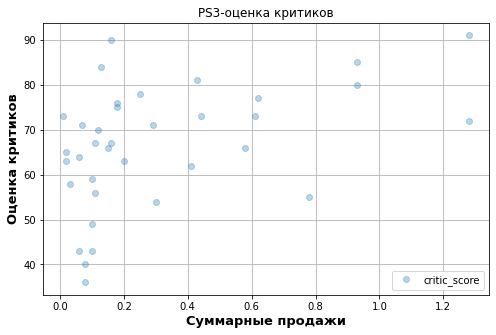

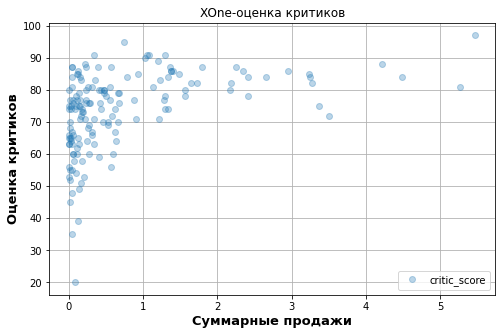

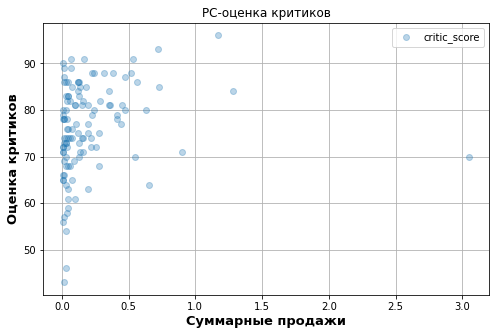

In [201]:
platform_list = ['PS3', 'XOne', 'PC']

for p in platform_list:
    a = data_actual[data_actual['platform'] == p]
    ax = a.plot(
    x='total_sales', y='critic_score', 
    style='o', alpha=0.3, 
    title=p + '-' + 'оценка критиков', 
    grid=True, figsize=(8,5)
)
    ax.set_xlabel("Суммарные продажи", labelpad=3, weight='bold', size=13)
    ax.set_ylabel("Оценка критиков", labelpad=3, weight='bold', size=13);
    

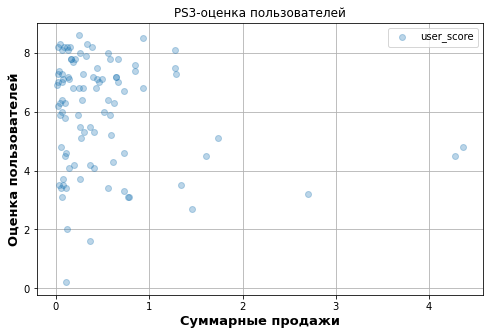

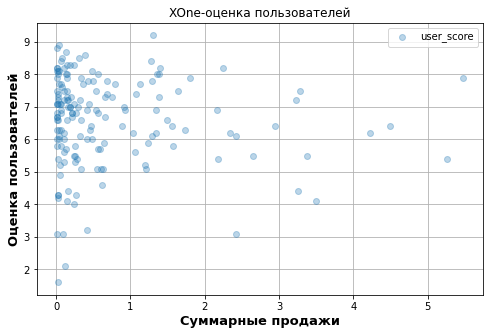

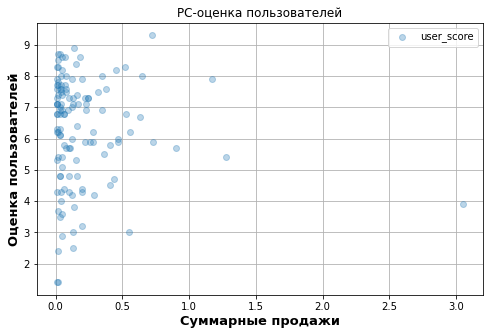

In [202]:
platform_list = ['PS3', 'XOne', 'PC']

for p in platform_list:
    a = data_actual[data_actual['platform'] == p]
    ax = a.plot(
    x='total_sales', y='user_score', 
    style='o', alpha=0.3, 
    title=p + '-' + 'оценка пользователей', 
    grid=True, figsize=(8,5)
)
    ax.set_xlabel("Суммарные продажи", labelpad=3, weight='bold', size=13)
    ax.set_ylabel("Оценка пользователей", labelpad=3, weight='bold', size=13);

**Выводы**

Диаграммы рассеяния, показывающие взаимосвязь между оценкой критиков и продажами, схожи по своей структуре для различных платформ. Для всех платформ можно выделить общую закономерность: при оценках от 60 до примерно 90 наблюдается увеличение продаж с увеличением оценки. При более низких и более высоких оценках такой взаимосвязи не наблюдается. 

Что касается оценок пользователей, то облака точек более рассеянные и не прослеживается чёткой взаимосвязи между двумя переменными. 

####  Распределение игр по жанрам
Какие жанры являются самыми прибыльными? Выделяются ли жанры с высокими и низкими продажами?

In [203]:
genre_group = data_actual.groupby('genre')['total_sales'].agg(['count','sum']).sort_values(by='sum',ascending=True)

genre_group['sum/count'] = genre_group['sum']/genre_group['count']

genre_group


,count,sum,sum/count
genre,,,
Puzzle,14,2.21,0.157857
Strategy,37,3.96,0.107027
Simulation,44,13.13,0.298409
Adventure,185,17.55,0.094865
Platform,38,18.09,0.476053
Racing,69,27.52,0.398841
Fighting,60,28.22,0.470333
Misc,113,37.55,0.332301
Role-Playing,221,101.44,0.459005


In [204]:
genre_group.index

Index(['Puzzle', 'Strategy', 'Simulation', 'Adventure', 'Platform', 'Racing',
       'Fighting', 'Misc', 'Role-Playing', 'Sports', 'Shooter', 'Action'],
      dtype='object', name='genre')

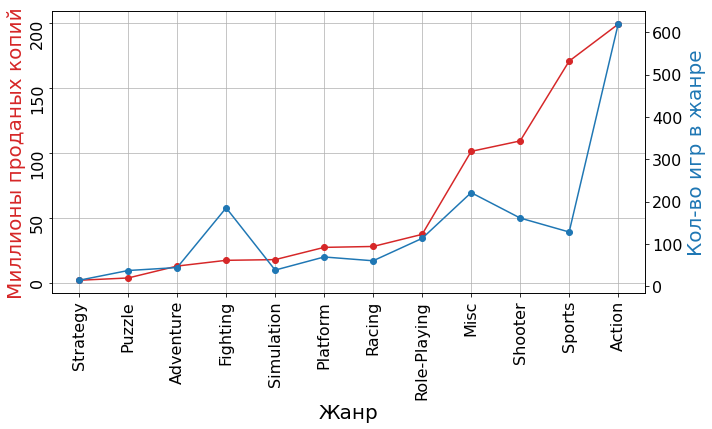

In [205]:
x = ['Strategy', 'Puzzle', 'Adventure', 'Fighting', 'Simulation', 'Platform',
       'Racing', 'Role-Playing', 'Misc', 'Shooter', 'Sports', 'Action']
y1 = genre_group['sum']
y2 = genre_group['count']

fig, ax1 = plt.subplots(1,1,figsize=(10,6))
ax1.plot(x, y1, color='tab:red', marker='o')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', marker='o')

ax1.set_xlabel('Жанр', fontsize=20)

ax1.set_ylabel('Миллионы проданых копий', color='tab:red', fontsize=20)
ax1.tick_params(labelsize=16, rotation=90)
ax1.grid(alpha=.9)

# ax2 (right Y axis)
ax2.set_ylabel("Кол-во игр в жанре", color='tab:blue', fontsize=20)
ax2.tick_params(labelsize=16)

fig.tight_layout()
plt.show()



Как мы видим из данного графика по суммарным продажам лидирует жанр Action, однако кол-во игр этого жанра также велико. То есть было продано очень много игр с относительно небольшой стоимостью,  поэтому получилось большое значение суммарных продаж. Для жанра Sports наоборот, было продано гораздо меньше игр, чем в жанре Action, но суммарные продажи близки к жанру Action. Значит каждая отдельная игра в жанре Sports дороже, чем игры в жанре Action.

Также на графике выделяется жанр Adventure. Было продано много игр, но суммарные продажи относительно небольшие. 


Построим столбчатую диаграмму для медианных значений глобальных продаж по жанрам.

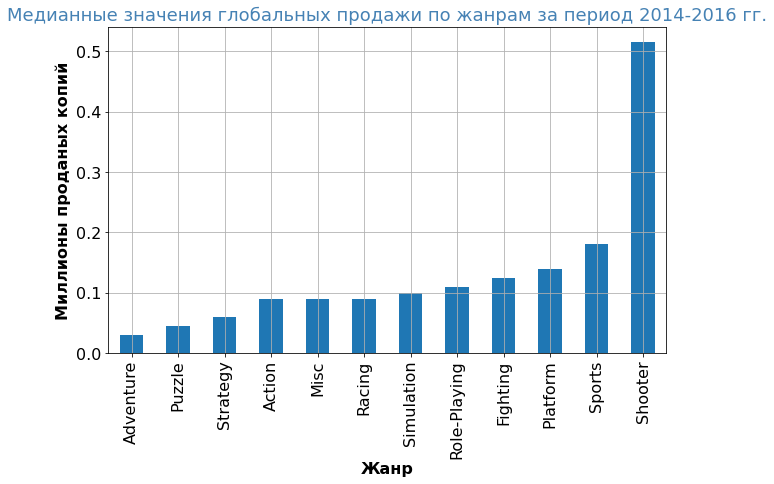

In [206]:
ax = data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(
    kind='bar', figsize = (10, 6), grid=True
)

ax.set_title('Медианные значения глобальных продажи по жанрам за период 2014-2016 гг.', fontsize = 18, color = 'SteelBlue') 
ax.set_xlabel("Жанр", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданых копий", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16)

Согласно этому графику самым прибыльным жанром является Shooter. Этот жанр лидирует с большим отрывом относительно других жанров. А наименее популярным жанром является Adventure. 

Построим ящик с усами, чтобы убедиться, что на разультаты не влияют аномально высокие значения. 

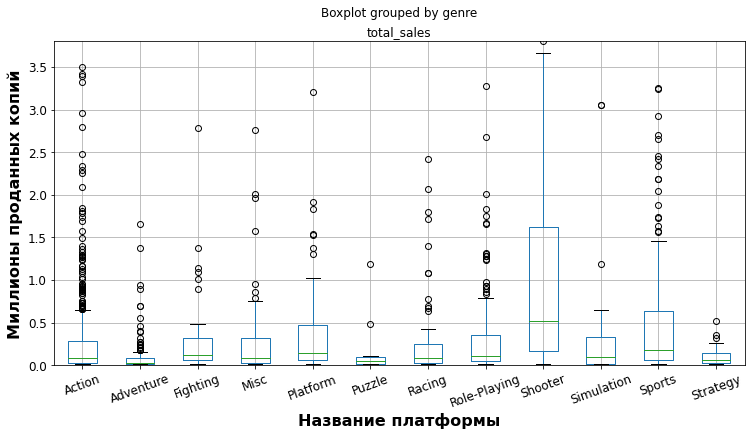

In [207]:
ax = data_actual.boxplot(column='total_sales', by='genre', figsize=(12,6))

ax.set_xlabel("Название платформы", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданных копий", labelpad=5, weight='bold', size=16)
ax.set_ylim(0, 3.8)
ax.tick_params(labelsize=12)
plt.xticks(rotation = 20);

**Выводы**

Для большинства жанров медианы находятся примерно на одном уровне. Это жанры Action, Fighting, Misc, Platform, Racing, Role-Playing, Simulation, Sports. То есть прибыль от игр этих жанров примерно одинаковая. 

Медианы для жанров Adventure, Puzzle, Strategy сильно смешены вниз и в целом межквартильный размах не очень большой относительно других жанров. То есть большинство значений глобальных продаж небольшие. Можно сделать вывод о том, что эти три жанра наименее прибыльные. 

Среди всех жанров, как и на предыдущем графике, выделяется Shooter. Межквартильный размах гораздо больше, чем для остальных жанров. Присутствуют выбросы и длинный верхний ус. Это говорит о том, что в выборке присутствует большое кол-во различных значений (высокая дисперсия), т.е. в этом жанре есть как очень прибыльные игры, так и не очень. Но в целом всё таки можно сделать вывод, что это наиболее прибыльный жанр. 

##  Портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


na_sales — продажи в Северной Америке (миллионы проданных копий)

eu_sales — продажи в Европе (миллионы проданных копий)

jp_sales — продажи в Японии (миллионы проданных копий)

### Самые популярные платформы в регионах

In [208]:
data_actual.groupby('platform')['na_sales'].sum()

platform
3DS     22.64
PC       7.23
PS3     22.05
PS4     98.61
PSP      0.00
PSV      2.52
Wii      2.08
WiiU    19.36
X360    28.30
XOne    81.27
Name: na_sales, dtype: float64

In [209]:
# создадим функцию для группировки по платформам и регионам и подсчёта долей продаж 
def regional_sales(columns):
    for column in columns:
        count_sales = data_actual.groupby('platform')[column].count()
        sum_sales = data_actual.groupby('platform')[column].sum()
        platform_grouped[column] = sum_sales/count_sales
      
    return platform_grouped.round(2)

In [210]:
platform_grouped = pd.DataFrame()

columns = ['na_sales', 'eu_sales', 'jp_sales']
regional_sales(columns)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.11,0.08,0.21
PC,0.05,0.12,0.00
PS3,0.10,0.12,0.05
PS4,0.26,0.35,0.04
PSP,0.00,0.00,0.03
PSV,0.01,0.01,0.05
Wii,0.19,0.24,0.00
WiiU,0.27,0.18,0.10
X360,0.25,0.14,0.00


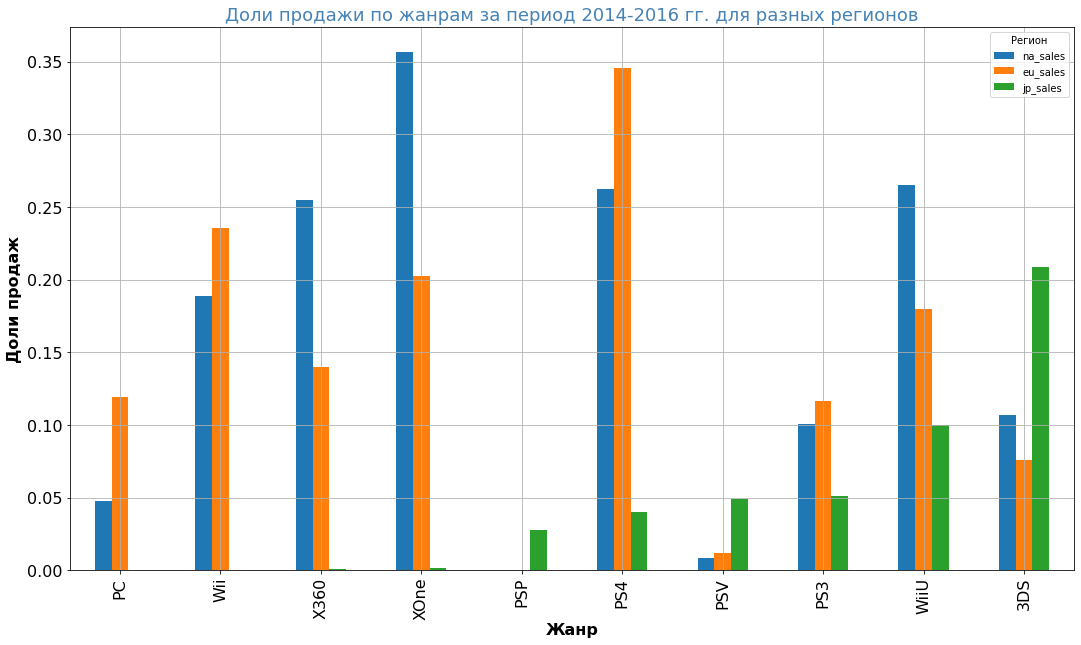

In [211]:
ax = platform_grouped.sort_values(by='jp_sales', ascending=True).plot(kind='bar', figsize=(18,10), grid=True)

ax.set_title('Доли продажи по жанрам за период 2014-2016 гг. для разных регионов', fontsize = 18, color = 'SteelBlue') 
ax.set_xlabel("Жанр", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Доли продаж", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16)
ax.legend(title='Регион');

Популярность платформ варьируется в зависимости от региона. 

В Северноей Америке в топ-5 наиболее популярных платформ входят: 
* X360
* XOne
* PS4
* WiiU
* Wii

В Европе топ-5 платформ: 
* PS4
* X360
* PS3
* XOne
* WiiU

В Японии топ-5 платформ: 
* 3DS
* WiiU
* PSP
* PS3
* PSV

### Самые популярные жанры в регионах

In [212]:
genre_grouped = pd.DataFrame()
def regional_genre(columns):
    for column in columns:
        
        count_sales = data_actual.groupby('genre')[column].count()
        sum_sales = data_actual.groupby('genre')[column].sum()
        genre_grouped[column] = sum_sales/count_sales
       
    return genre_grouped

In [213]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

regional_genre(columns)

,na_sales,eu_sales,jp_sales
genre,,,
Action,0.117173,0.120646,0.047787
Adventure,0.030486,0.035081,0.019459
Fighting,0.207167,0.111500,0.106167
Misc,0.133186,0.113805,0.049646
Platform,0.178684,0.178947,0.070789
Puzzle,0.046429,0.037143,0.066429
Racing,0.126667,0.204783,0.025507
Role-Playing,0.151448,0.127466,0.140995
Shooter,0.617344,0.511875,0.038047


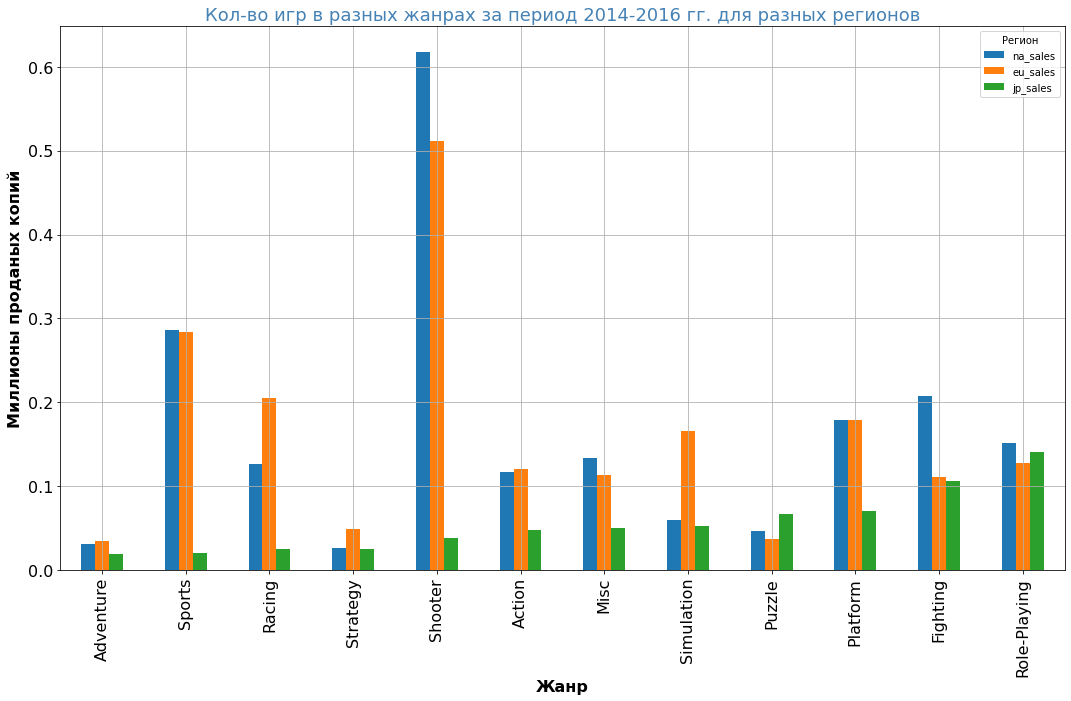

In [214]:
ax = genre_grouped.sort_values(by='jp_sales', ascending=True).plot(kind='bar', figsize=(18,10), grid=True)

ax.set_title('Кол-во игр в разных жанрах за период 2014-2016 гг. для разных регионов', fontsize = 18, color = 'SteelBlue') 
ax.set_xlabel("Жанр", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданых копий", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16)
ax.legend(title='Регион');

In [215]:
data_actual.loc[data_actual['genre'] == 'Adventure', 'jp_sales'].count()

185

In [216]:
data_actual['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

**Выводы**

В популярности жанров также есть региональные различия. 

В Северной Америке отдают предпочтение:
* Action
* Sports
* Shooter
* Misc
* Role-Playing

В Европе схожие предпочтения по жанрам, но вместо Role-Playing европейцы предпочитают Racing.

Предпочтения по жанрам в Японии значительно отличаются. Так в топ-5 входят:
* Role-Playing
* Platform
* Fighting
* Misc
* Simulation

### Влияние рейтинга ESRB на продажи в регионах

In [217]:
rating_grouped = pd.DataFrame()

def regional_rating(columns):
    for column in columns:
        
        count_sales = data_actual.groupby('rating')[column].count()
        sum_sales = data_actual.groupby('rating')[column].sum()
        rating_grouped[column] = sum_sales/count_sales
       
    return rating_grouped

In [218]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

regional_rating(columns)

,na_sales,eu_sales,jp_sales
rating,,,
E,0.231689,0.265114,0.040822
E10+,0.179622,0.141405,0.024108
M,0.363849,0.352604,0.030226
T,0.143727,0.125720,0.054539
unknown,0.086409,0.078705,0.075968


* «E» («Everyone») — «Для всех»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «M» («Mature») — «Для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «T» («Teen») — «Подросткам»

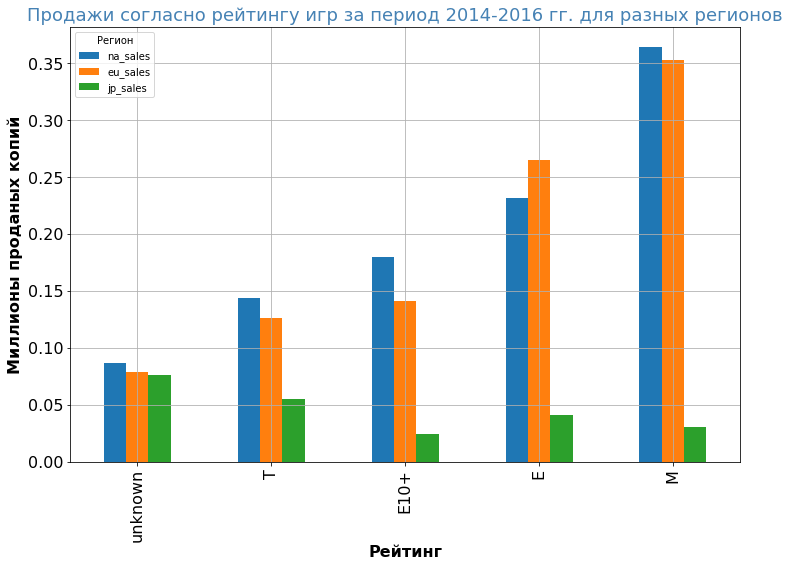

In [219]:
ax = rating_grouped.sort_values(by='na_sales', ascending=True).plot(kind='bar', figsize=(12,8), grid=True)

ax.set_title('Продажи согласно рейтингу игр за период 2014-2016 гг. для разных регионов', fontsize = 18, color = 'SteelBlue') 
ax.set_xlabel("Рейтинг", labelpad=3, weight='bold', size=16)
ax.set_ylabel("Миллионы проданых копий", labelpad=5, weight='bold', size=16)
ax.tick_params(labelsize=16)
ax.legend(title='Регион');

**Выводы**

Для Северной Америки и Европы больше всего было продано игр с рейтингом "М" (для взрослых). И в целом распределение продаж согласно рейтингу одинаковое для этих двух регионов. Единственное отличие, что в Европе за исследуемый период было продано больше игр с рейтингом "E" (для всех), а в Северной Америке больше с рейтингами"E10+" и "Т". 

Взаимосвязь продаж и рейтинга для Японии отличается. Больше всего было продано игр с неизвестным рейтингом, а меньше всего с "E10+" (Для всех от 10 лет и старше). 

Что касается группы с неизвестным рейтингом ("unknown"), то продажи в примерно одинаковые для трёх регионов, с небольшим преобладанием для Северной Америке. 

## Проверка гипотезы

Для проверки гипотез будем использовать t-тест, поскольку он работает для выборки любого размера.
Для применения t-теста существует ряд требований: 
* Генеральные совокупности не должны зависеть друг от друга. 

Поскольку мы сравниваем оценки двух разных платформ/жанров, наши данные удовлетворяют этому требованию. 

* Выборочные средние должны быть нормально распределены. 

Для выборок с более чем в несколько десятков значений, согласно ЦПТ, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. В работе рассматривается довольно обширный период времени, выборки достаточно большого размера, чтобы удовлетворить данное условие.

* Дисперсии рассматриваемых генеральных совокупностей должны быть равны. 

В данном случае мы будем сравнивать оценки пользователей, значения которых варьируются в известном пределе от 0 до 10. Можем предположить, что дисперсии для ГС будут равны. Также, из теории мы знаем, что "*симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.*" Поэтому можем использовать t-тест для проверки гипотез. 





### Гипотеза 1: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и алтернативную гипотезы.

H₀: средний пользовательский рейтинг платформы Xbox One  = среднему пользовательскому рейтингу платформы PC

H₁: средний пользовательский рейтинг платформы Xbox One  != среднему пользовательскому рейтингу платформы PC

In [220]:
# Запишим в отдельные переменные значения оценок пользователей по платформам XOne и РС, 
# исключим пропуски для корректной работы t-теста

xone_score = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'].notna())]['user_score']
pc_score = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'].notna())]['user_score']

In [221]:
# посчитаем длину выборок
print(len(xone_score))
len(pc_score)

165


122

Выборки разного размера, equal_var нужно указать как False, поскольку мы не можем утверждать, что десперсии этих двух выборок равны. 

In [222]:
# проведём t-тест 

alpha = .05 # критический уровень статистической значимости# если p-value окажется меньше него - отвергнем гипотезу  

results = st.ttest_ind(xone_score, pc_score, equal_var=False)  
print('p-значение:', round(results.pvalue, 5))  

if results.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу") 
else:     
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.11601
Не получилось отвергнуть нулевую гипотезу


**Выводы**

После проперки гипотезы можем сделать вывод, что для данных выборок, при уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Средние пользовательские рейтинги платформ Xbox One и PC различны. 

### Гипотеза 2: 

Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и алтернативную гипотезы.

H₀: средний пользовательский рейтинг жанров Action = среднему пользовательскому рейтингу жанров Sports

H₁: средний пользовательский рейтинг жанров Action != среднему пользовательскому рейтингу жанров Sports

In [223]:
# Запишим в отдельные переменные значения оценок пользователей по жанрам Action и Sports, 
# исключим пропуски для корректной работы t-теста

action_score = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'].notna())]['user_score']
sports_score = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'].notna())]['user_score']

In [224]:
# посчитаем длину выборок
print(len(action_score))
len(sports_score)

297


127

In [225]:
# проведём t-тест 

alpha = .05 # критический уровень статистической значимости# если p-value окажется меньше него - отвергнем гипотезу  

results = st.ttest_ind(action_score, sports_score, equal_var=False)  
print('p-значение:', results.pvalue)  

if results.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу") 
else:     
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**

После проперки гипотезы можем сделать вывод, что для данных выборок, при уровне значимости 5%, есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Средние пользовательские рейтинги жанров Action и Sports различны. 

## Общие выводы

**1. Данные**

В работе были использована базы данных по продажам игр за период с 1985 по 2016 год. 
В столбцах с оценками  игре ('critic_score', 'rating' и 'user_score') пропущено примерно от 40 до 50% данных. Пропуски не заполнялись. 

В столбце 'year_of_release', 'name', 'genre' также есть пропуски, но их менее 5% от общего числа дынных. Эти строки были удалены. 

По данным за весь исследуемый период наиболее популярными (с наибольшими суммарными продажами) платформами являлись:
* PS
* DS
* Wii
* PS3
* X360
* PS2

В 2008 году было выпущено максимальное количество игр за весь период.

**2. Актуальный период**

Изучив распределение количества выпущенных в год игр и распределение по годам кол-ва проданных копий для 9 наиболее популярных платформ, для дальнейшего исследования был выбран период с 2014 по 2016 гг. 

Для всех платформ существовавших в этот период наблюдается выраженная тенденция на снижение продаж. Но всё же, можно выделить две платформы, как потенциально прибыльные - это PS4 и XOne - лидеры по продажам в 2014-2016 гг..

**Влияние отзывов на продажи**

Была выявлена слабая положительная связь между оценками критиков и продажам. Сила влияние продаж в зависимости от региона и платформы варьируется.

Между оценкой пользователей и продажами связи выявлено не было. 

**Наиболее популярные жанры за период 2014-2016 гг.**
* Action
* Sports
* Shooter 
* Misc
* Role-Playing

Наименее популярными являются жанры Strategy, Puzzle и Adventure.


**Наиболее прибыльные жанры**

Наиболее прибыльным жанром является Shooter.

A жанры Adventure, Puzzle, Strategy являются наименее прибыльными. 

Прибыльность остальных жанров схожа. 

**3. Портрет пользователя каждого региона**

Популярность платформ и жанров варьируется в зависимости от региона. Предпочтения пользователей в Северной Америке и Европе близки друг к другу, а предпочтения японских пользователей разительно отличаются. 

Что касается влияние рейтинга на продажи, опять закономерности схожи для Северной Америки и Европы. Больше всего продано игр с рейтингом "М" (для взрослых". В Японии лидеры продаж - игры с неизвестным рейтингом. 

**4. Проверка гипотез о равенстве средних**

Было проверено две гипотезы.
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2) Средние пользовательские рейтинги жанров Action и Sports разные

Проверка гипотез с помощью t-теста показала, что нет оснований принимать первую гипотезу и что есть основания принимать вторую. 
Как средние пользовательские рейтинги платформ Xbox One и PC, так и средние пользовательские рейтинги жанров Action и Sports, различны.



**Общие рекомендации для интернет-магазина "Стримчик"**

Стоит отдавать предпочтение играм, выпущенных для платформ PS4 и XOne и играм с рейтингом "М". Среди жанров стоит обратить внимание на Shooter. 
Из корреляционного анализа можно сделать вывод, что пользователи при выборе игр больше ориентируются на оценки критиков, чем на оценки пользователей. 